In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
database_path = "Resources/hawaii.sqlite"
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Precipitation Analysis 

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement).order_by(Measurement.date.desc()).first()
#most_recent.__dict__

most_recent = most_recent.__dict__['date']
most_recent

'2017-08-23'

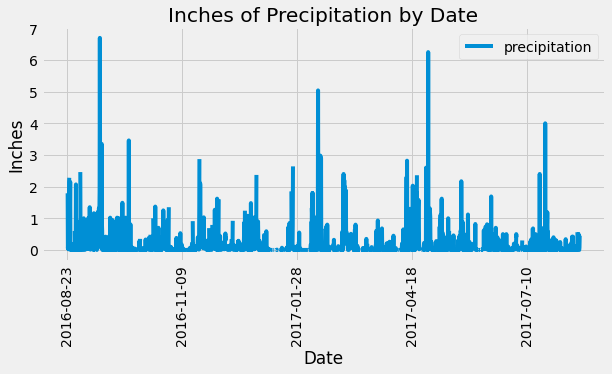

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = dt.datetime.strptime('2017-08-23', '%Y-%m-%d').date()
#most_recent #2017-08-23

# Calculate the date one year from the last date in data set.
year_ago = most_recent - dt.timedelta(days=365)
#year_ago #2016-08-23

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
        filter(func.strftime('%Y-%m-%d', Measurement.date) >= year_ago)
#results

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df = df.set_index('date')
#df

# Sort the dataframe by date
df = df.sort_values(by='date')
#df

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90, figsize=(9,4))

plt.title('Inches of Precipitation by Date')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df["precipitation"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

## Exploratory Station Analysis

In [15]:
row = session.query(Station).first()
row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x26b46e76048>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [ ]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).select([func.count(census.columns.pop2008.distinct())])

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

## Close Session

In [ ]:
 # Close Session
session.close()